# <u> Module 4 Challenge </u>
## <i> Portfolio Quantitative Analysis </i>

In [1]:
#Module 4 Challenge
#Portfolio Quantitative Analysis

### Import libraries and dependencies

In [38]:
#Import libraries and dependencies
import pandas as pd
import numpy as np
from pathlib import Path
import seaborn as sns

%matplotlib inline

### Set Files Paths and Read CSV as Dataframe

In [3]:
#Set the file paths 
whale_path = Path("Starter_Code/Resources/whale_returns.csv")
algo_path = Path("Starter_Code/Resources/algo_returns.csv")
sp_tsx_path = Path("Starter_Code/Resources/sp_tsx_history.csv")

#Read the .CSVs and set the 'date' column as a datetime index to the DataFrame
whale_df = pd.read_csv(whale_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_df = pd.read_csv(algo_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp_tsx_df = pd.read_csv(sp_tsx_path, index_col="Date", infer_datetime_format=True, parse_dates=True)

### Clean Data and Drop NAN/NA & Null Values

In [4]:
#Clean data - Drop NA & Null Values 
whale_df = whale_df.dropna().copy()
algo_df = algo_df.dropna().copy()
sp_tsx_df = sp_tsx_df.dropna().copy()

sp_tsx_df['Close'] = sp_tsx_df['Close'].replace('\$|,', '', regex=True)
sp_tsx_df['Close'] = sp_tsx_df['Close'].astype(float)

#Clean up dollar sign ($) ascii character(s) from second price column 
#sp_tsx_df['Close'] = sp_tsx_df['Close'].replace('$', '')
#sp_tsx_df

#test to see if 0/NAN data is removed; looks good so far
#whale_df.iloc[40:60,:]

### Calculate S&P TSX 60 Daily Returns

In [5]:
#Calculate daily returns from S&P TSX 60 CSV data table to prepare for concat with the other data tables
sp_tsx_df['Close'].dtypes

daily_returns_sp_tsx = sp_tsx_df.pct_change()
daily_returns_sp_tsx = daily_returns_sp_tsx.dropna().copy()

#Print sample of daily returns for the S&P TSX 60 dataframe
daily_returns_sp_tsx.head(5)

,Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


### Concatenate All Whale, Algo, and S&P TSX 60 DataFrames Into Singular Daily Returns Combined DataFrame

In [6]:
#Create a new Dataframe where the columns are the closing prices for each ticker
combined_df = pd.concat([whale_df, algo_df, daily_returns_sp_tsx], axis="columns", join="inner")
combined_df = combined_df.rename(columns={"Close":"S&P TSX 60"})
combined_df = combined_df.sort_index(ascending=True)
combined_df.head(4)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972


### Plot of Daily Returns for All Portfolios

<AxesSubplot:title={'center':'Daily Returns of All Portfolios Across Time'}, xlabel='Date'>

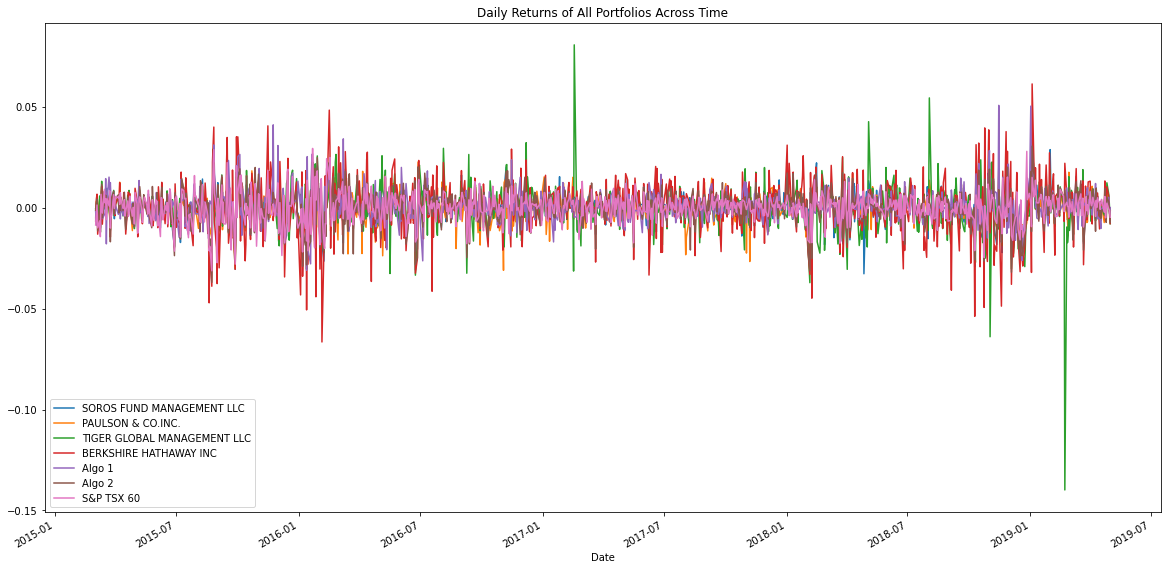

In [7]:
#Calculate and plot daily returns for all portfolios
combined_df.plot(figsize=(20,10), title="Daily Returns of All Portfolios Across Time")

### Calculate and Plot Cumulative Returns For All Portfolios Across Time

#### i.) 'Whale' Portfolio Cumulative Returns

<AxesSubplot:title={'center':'Whale Portfolio Cumulative Daily Returns'}, xlabel='Date'>

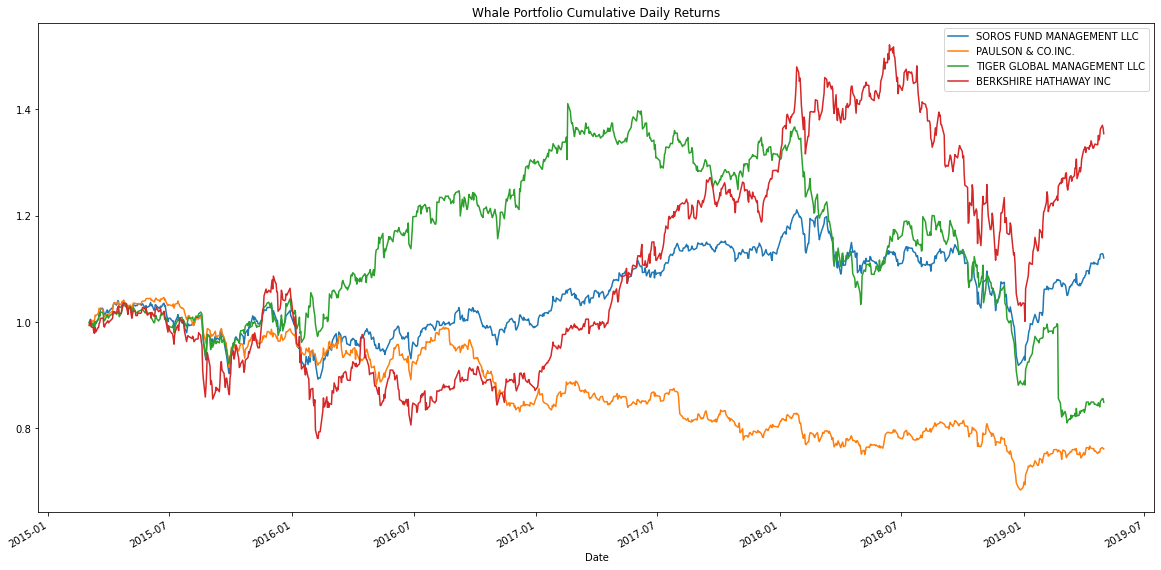

In [8]:
#Set initial investment
whale_initial_inv = 10000

#Use the 'cumprod' function to calculate the whale stock portfolio's cumulative returns
whale_cumulative_returns = (1 + combined_df[["SOROS FUND MANAGEMENT LLC", "PAULSON & CO.INC. ", "TIGER GLOBAL MANAGEMENT LLC", "BERKSHIRE HATHAWAY INC"]]).cumprod()
whale_cumulative_returns.plot(figsize=(20,10), title="Whale Portfolio Cumulative Daily Returns")

<AxesSubplot:title={'center':'Whale Portfolio Profits from Hypothetical $10k Initial Investment'}, xlabel='Date'>

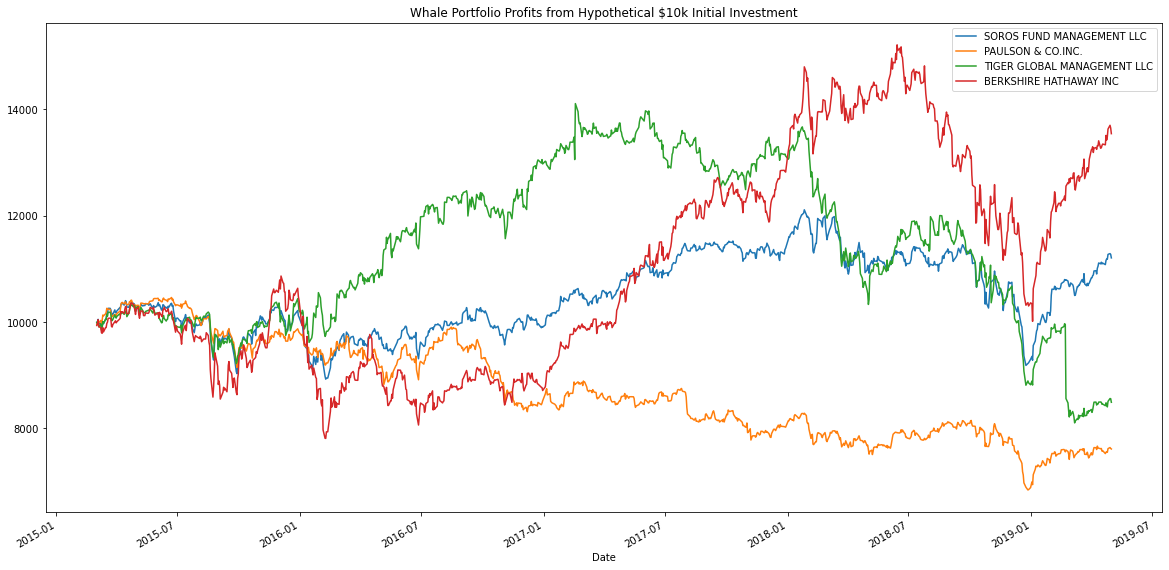

In [9]:
#Hypothetical Cumulative Daily Returns on Whale Portfolio's (Normalized to an Initial Investment of $10,000)
whale_cumulative_profits = (whale_initial_inv*whale_cumulative_returns)
whale_cumulative_profits.plot(figsize=(20,10), title="Whale Portfolio Profits from Hypothetical $10k Initial Investment")

#### ii.) Algo Portfolio Cumulative Returns

<AxesSubplot:title={'center':'Algo Portfolio Daily Returns'}, xlabel='Date'>

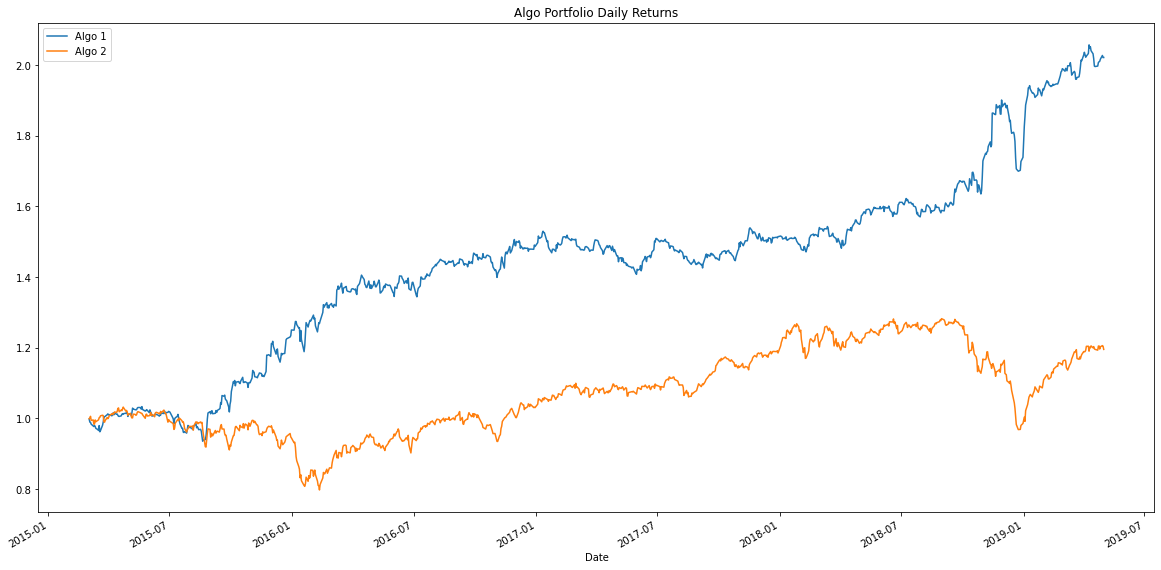

In [10]:
#Set initial investment 
algo_initial_inv = 10000

#Use the 'cumprod' function to calculate the algo portfolio's cumulative returns 
algo_cumulative_returns = (1 + combined_df[["Algo 1", "Algo 2"]]).cumprod()
algo_cumulative_returns.plot(figsize=(20,10), title="Algo Portfolio Daily Returns")

<AxesSubplot:title={'center':'Algo Portfolio Profits from Hypothetical $10k Initial Investment'}, xlabel='Date'>

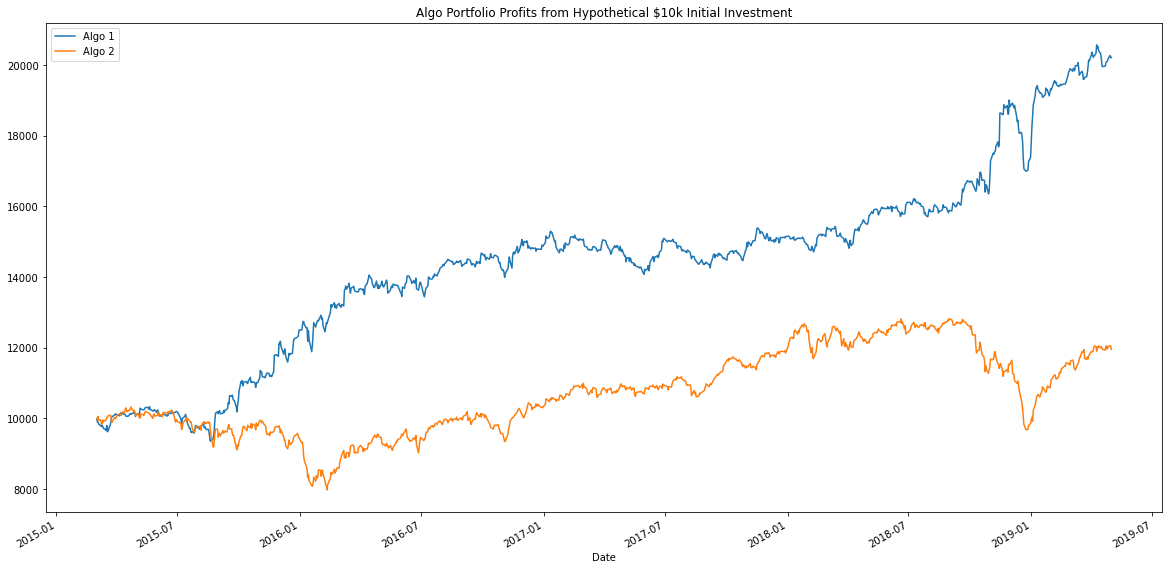

In [11]:
#Hypothetical Cumulative Daily Returns on Algo Portfolio's (Normalized to an Initial Investment of $10,000)
algo_cumulative_profits = (algo_initial_inv*algo_cumulative_returns)
algo_cumulative_profits.plot(figsize=(20,10), title="Algo Portfolio Profits from Hypothetical $10k Initial Investment")

### iii.) S&P TSX 60 Cumulative Returns

<AxesSubplot:title={'center':'S&P TSX 60 Cumulative Daily Returns'}, xlabel='Date'>

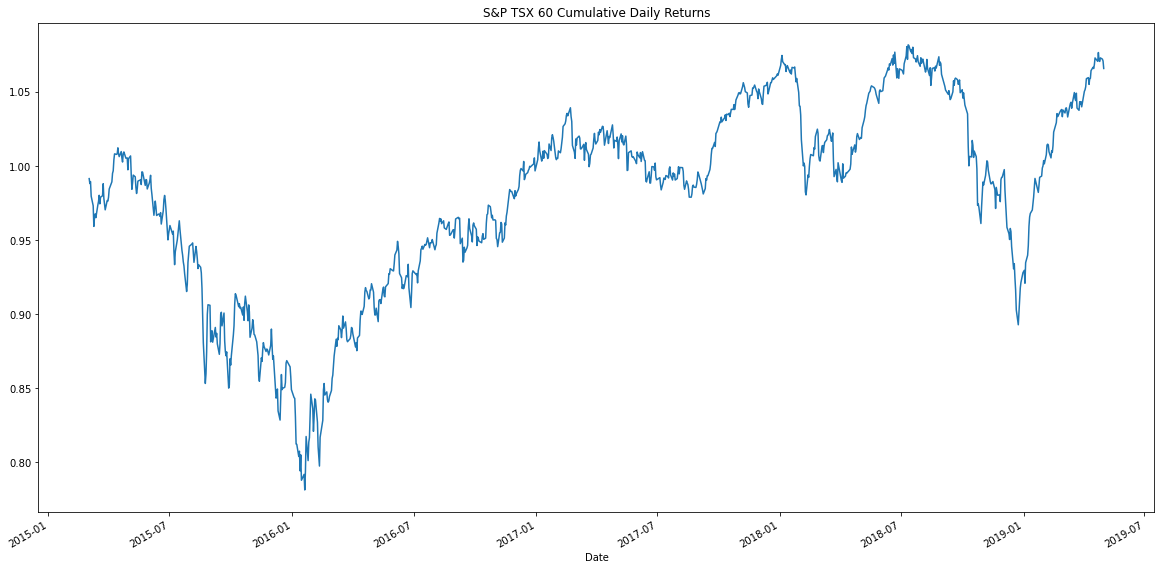

In [12]:
#Set initial investment
sp_tsx_initial_inv = 10000

#Use the 'cumprod' function to calculate the S&P TSX 60 cumulative retruns
sp_tsx_cumulative_returns = (1 + combined_df["S&P TSX 60"]).cumprod()
sp_tsx_cumulative_returns.plot(figsize=(20,10), title="S&P TSX 60 Cumulative Daily Returns")

### Calculate and Plot Cumulative Returns for All Portfolios

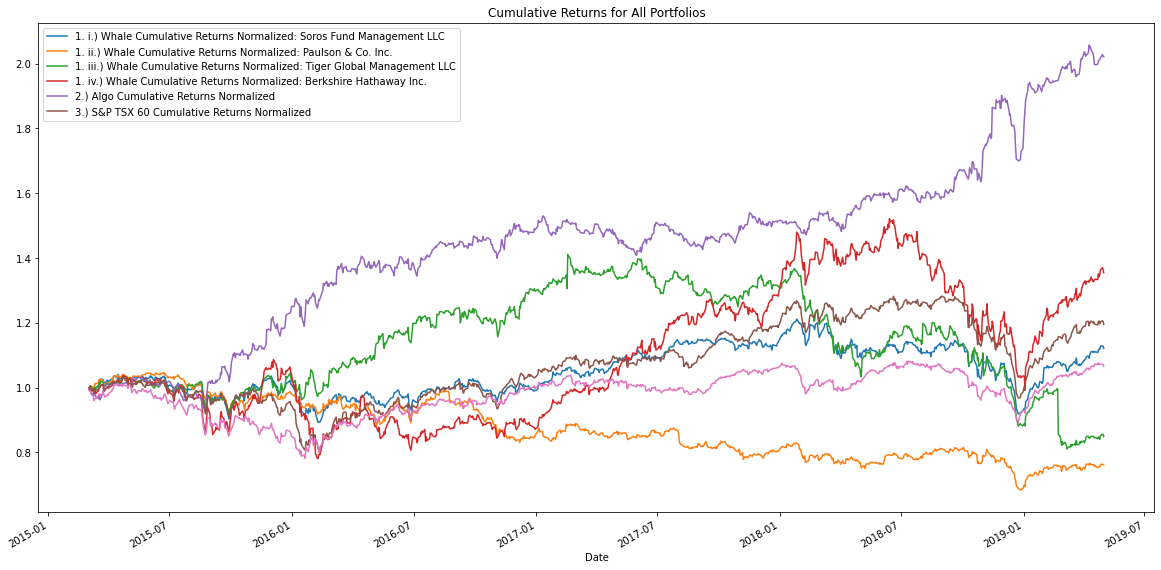

In [13]:
# Set the figure of the chart and plot each trend on the single figure
ax = whale_cumulative_returns.plot(figsize=(20,10), title="Cumulative Returns for All Portfolios")
algo_cumulative_returns.plot(ax=ax)
sp_tsx_cumulative_returns.plot(ax=ax)

ax.legend(['1. i.) Whale Cumulative Returns Normalized: Soros Fund Management LLC',
           '1. ii.) Whale Cumulative Returns Normalized: Paulson & Co. Inc.',
           '1. iii.) Whale Cumulative Returns Normalized: Tiger Global Management LLC',
           '1. iv.) Whale Cumulative Returns Normalized: Berkshire Hathaway Inc.',
           '2.) Algo Cumulative Returns Normalized', 
           '3.) S&P TSX 60 Cumulative Returns Normalized'])

<AxesSubplot:title={'center':'Cumulative Returns for All Portfolios - Combined DF'}, xlabel='Date'>

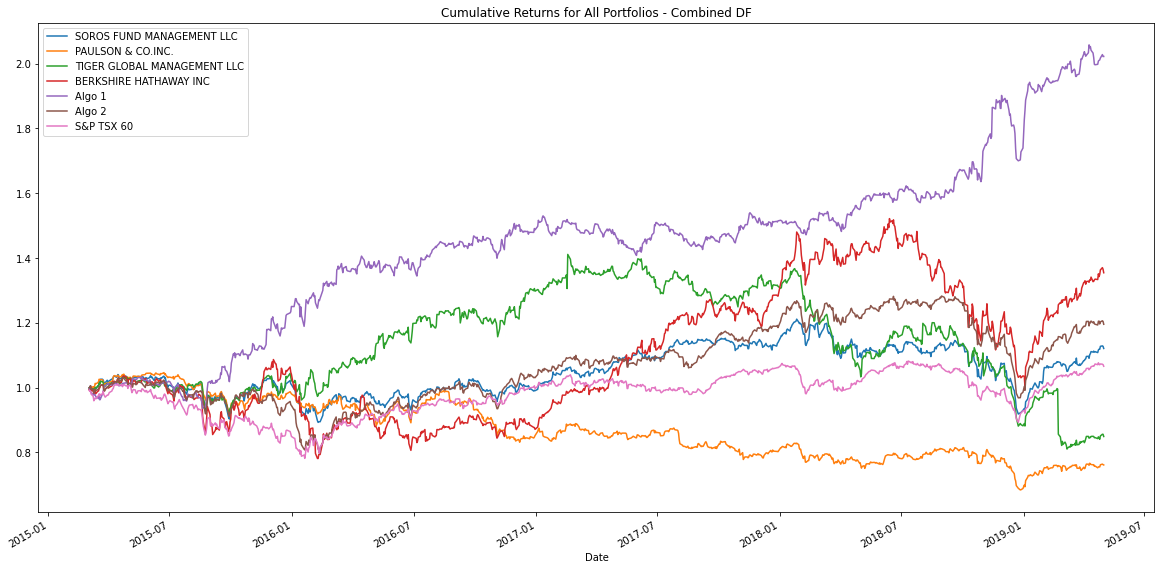

In [14]:
combined_cumulative_returns = (1 + combined_df).cumprod()
combined_cumulative_returns.plot(figsize=(20,10), title="Cumulative Returns for All Portfolios - Combined DF")

### Portfolios Quantitatively Outperforming the S&P TSX 60:
#### It appears there are four portfolios currently outperforming the S&P index: i.)Soros Fund Management LLC, ii.) Berkshire Hathaway, iii.) Algo Portfolio 1 and iv.) Algo Portfolio 2. 

### Box Plot for Each Portfolio Return

<AxesSubplot:title={'center':'Box Plot Return For Each Portfolio Return'}>

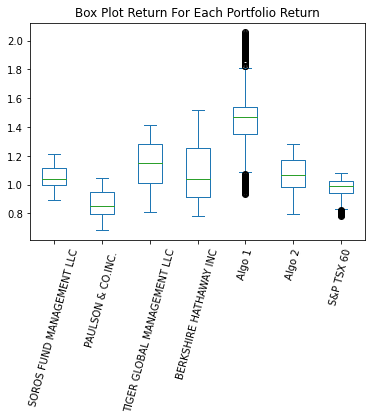

In [15]:
#Box plot for each return
combined_cumulative_returns.plot.box(title="Box Plot Return For Each Portfolio Return", rot=75)

### Calculate Standard Deviation of Daily Returns

#### i.) Whale Portfolio Daily Standard Deviations

In [16]:
#Whale Portfolio Daily Standard Deviations
whale_daily_std = whale_cumulative_returns.std()
whale_daily_std

SOROS FUND MANAGEMENT LLC      0.070271
PAULSON & CO.INC.              0.090735
TIGER GLOBAL MANAGEMENT LLC    0.148722
BERKSHIRE HATHAWAY INC         0.196871
dtype: float64

#### ii.) Algo Portfolio Daily Standard Deviations

In [17]:
#Algo Portfolio Daily Standard Deviations
algo_daily_std = algo_cumulative_returns.std()
algo_daily_std

Algo 1    0.258839
Algo 2    0.116607
dtype: float64

#### iii.) S&P TSX 60 Daily Standard Deviations

In [18]:
#S&P TSX 60 Daily Standard Deviations
sp_tsx_std = sp_tsx_cumulative_returns.std()
sp_tsx_std

0.06435360632809134

In [19]:
#Combined DF Daily Standard Deviations
combined_daily_std = combined_cumulative_returns.std()
combined_daily_std

SOROS FUND MANAGEMENT LLC      0.070271
PAULSON & CO.INC.              0.090735
TIGER GLOBAL MANAGEMENT LLC    0.148722
BERKSHIRE HATHAWAY INC         0.196871
Algo 1                         0.258839
Algo 2                         0.116607
S&P TSX 60                     0.064354
dtype: float64

### Portfolios Riskier Than the S&P TSX 60

In [20]:
if ((combined_daily_std['SOROS FUND MANAGEMENT LLC']) > (combined_daily_std['S&P TSX 60'])):
    print(f"SOROS FUND MANAGEMENT LLC is riskier than the S&P TSX 60 with a std deviation of " 
        f"{round(combined_daily_std['SOROS FUND MANAGEMENT LLC'], 4)} and {round(combined_daily_std['S&P TSX 60'], 4)}, respectively.")
else:
    print("The S&P TSX 60 is riskier than SOROS FUND MANAGEMENT LLC"
        f" with a std deviation of {round(combined_daily_std['S&P TSX 60'], 4)} and {round(combined_daily_std['SOROS FUND MANAGEMENT LLC'], 4)}, respectively.")


SOROS FUND MANAGEMENT LLC is riskier than the S&P TSX 60 with a std deviation of 0.0703 and 0.0644, respectively.


In [21]:
if ((combined_daily_std[1]) > (combined_daily_std['S&P TSX 60'])):
    print(f"PAULSON & CO.INC. is riskier than the S&P TSX 60 with a std deviation of "
          f"{round(combined_daily_std[1], 4)} and {round(combined_daily_std['S&P TSX 60'], 4)}, respectively.")
else:
    print("The S&P TSX 60 is riskier than PAULSON & CO.INC."
        f" with a std deviation of {round(combined_daily_std['S&P TSX 60'], 4)} and {round(combined_daily_std[1], 4)}, respectively.")   

PAULSON & CO.INC. is riskier than the S&P TSX 60 with a std deviation of 0.0907 and 0.0644, respectively.


In [22]:
if ((combined_daily_std[2]) > (combined_daily_std['S&P TSX 60'])):
    print(f"TIGER GLOBAL MANAGEMENT LLC is riskier than the S&P TSX 60 with a std deviation of "
          f"{round(combined_daily_std[2], 4)} and {round(combined_daily_std['S&P TSX 60'], 4)}, respectively.")
else:
    print("The S&P TSX 60 is riskier than TIGER GLOBAL MANAGEMENT LLC."
        f" with a std deviation of {round(combined_daily_std['S&P TSX 60'], 4)} and {round(combined_daily_std[2], 4)}, respectively.")   

TIGER GLOBAL MANAGEMENT LLC is riskier than the S&P TSX 60 with a std deviation of 0.1487 and 0.0644, respectively.


In [23]:
if ((combined_daily_std[3]) > (combined_daily_std['S&P TSX 60'])):
    print(f"BERKSHIRE HATHAWAY INC is riskier than the S&P TSX 60 with a std deviation of "
          f"{round(combined_daily_std[3], 4)} and {round(combined_daily_std['S&P TSX 60'], 4)}, respectively.")
else:
    print("The S&P TSX 60 is riskier than BERKSHIRE HATHAWAY INC"
        f" with a std deviation of {round(combined_daily_std['S&P TSX 60'], 4)} and {round(combined_daily_std[3], 4)}, respectively.")   

BERKSHIRE HATHAWAY INC is riskier than the S&P TSX 60 with a std deviation of 0.1969 and 0.0644, respectively.


In [24]:
if ((combined_daily_std[4]) > (combined_daily_std['S&P TSX 60'])):
    print(f"Algo 1 is riskier than the S&P TSX 60 with a std deviation of "
          f"{round(combined_daily_std[4], 4)} and {round(combined_daily_std['S&P TSX 60'], 4)}, respectively.")
else:
    print("The S&P TSX 60 is riskier than Algo 1."
        f" with a std deviation of {round(combined_daily_std['S&P TSX 60'], 4)} and {round(combined_daily_std[4], 4)}, respectively.")   

Algo 1 is riskier than the S&P TSX 60 with a std deviation of 0.2588 and 0.0644, respectively.


In [25]:
if ((combined_daily_std[5]) > (combined_daily_std['S&P TSX 60'])):
    print(f"Algo 2 is riskier than the S&P TSX 60 with a std deviation of "
          f"{round(combined_daily_std[5], 4)} and {round(combined_daily_std['S&P TSX 60'], 4)}, respectively.")
else:
    print("The S&P TSX 60 is riskier than Algo 2."
        f" with a std deviation of {round(combined_daily_std['S&P TSX 60'], 4)} and {round(combined_daily_std[5], 4)}, respectively.")   

Algo 2 is riskier than the S&P TSX 60 with a std deviation of 0.1166 and 0.0644, respectively.


### Calculate the Annualised Standard Deviations / Volatility of All Portfolios

In [26]:
#Volatility 
combined_annual_std = combined_df.std() * np.sqrt(252)
combined_annual_std

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
S&P TSX 60                     0.111664
dtype: float64

### Rolling Statistics

#### i.) 21-Day Window Rolling Standard Deviation (All Portfolios)

<AxesSubplot:xlabel='Date'>

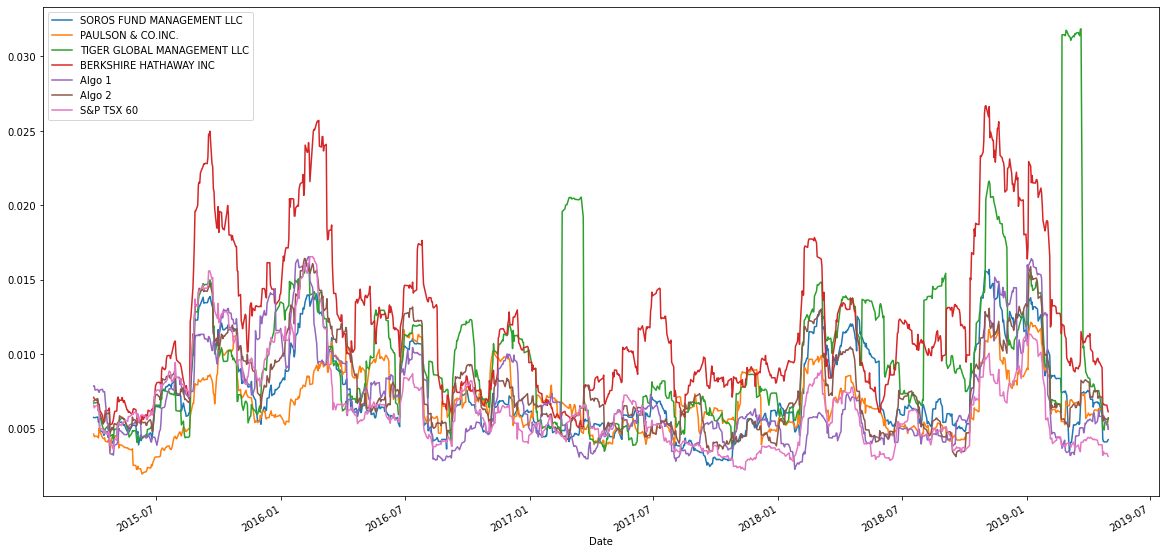

In [29]:
#Rolling 21-Day Std Deviation for All Portfolios
combined_df.rolling(window=21).std().plot(figsize=(20,10))

<AxesSubplot:xlabel='Date'>

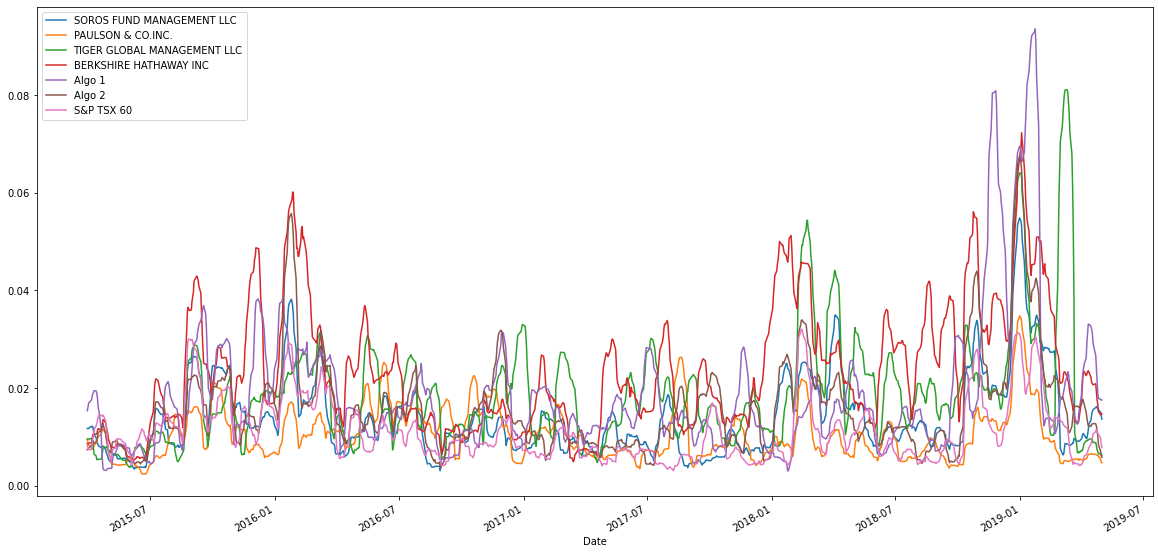

In [30]:
combined_cumulative_returns.rolling(window=21).std().plot(figsize=(20,10))

#### ii.) Price & Daily Return Correlations Between Each Stock

##### 1.) Daily Return Correlation Amongst All Portfolios

In [35]:
#Daily Return Correlation Amongst All Portfolios
daily_return_correlation = combined_df.corr()
daily_return_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
S&P TSX 60,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


<AxesSubplot:>

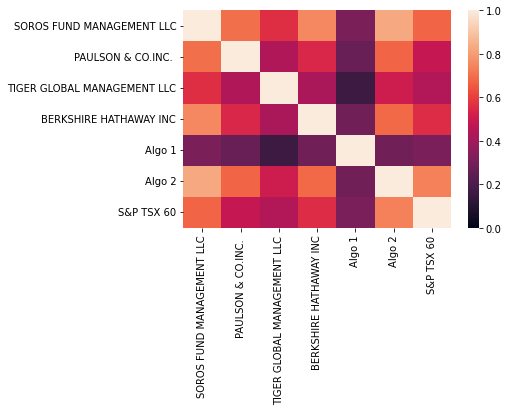

In [39]:
#Plot of Daily Return Correlation Amongst All Portfolios
sns.heatmap(daily_return_correlation, vmin=0, vmax=1)

##### 2.) Price Correlation Amongst All Portfolios

In [37]:
#Price Correlation Amongst All Portfolios
price_correlation = combined_cumulative_returns.corr()
price_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
SOROS FUND MANAGEMENT LLC,1.000000,-0.599250,0.428731,0.879331,0.419924,0.898351,0.809598
PAULSON & CO.INC.,-0.599250,1.000000,-0.167546,-0.710741,-0.876459,-0.736731,-0.604204
TIGER GLOBAL MANAGEMENT LLC,0.428731,-0.167546,1.000000,0.064462,0.047300,0.242755,0.370814
BERKSHIRE HATHAWAY INC,0.879331,-0.710741,0.064462,1.000000,0.524672,0.920725,0.720103
Algo 1,0.419924,-0.876459,0.047300,0.524672,1.000000,0.590275,0.528311
Algo 2,0.898351,-0.736731,0.242755,0.920725,0.590275,1.000000,0.886327
S&P TSX 60,0.809598,-0.604204,0.370814,0.720103,0.528311,0.886327,1.000000


<AxesSubplot:>

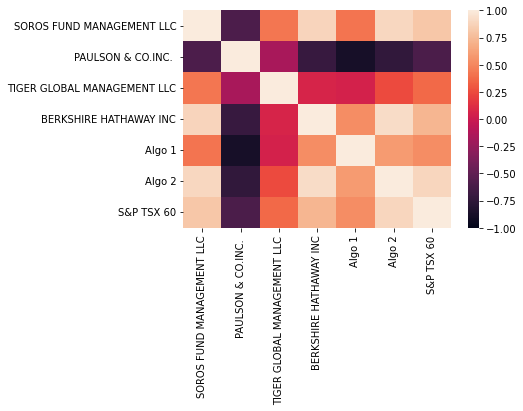

In [40]:
#Plot of Price Correlation Amongst All Portfolios
sns.heatmap(price_correlation, vmin=-1, vmax=1)

#### iii.) 60-Day Rolling Beta Between SOROS FUND MANAGEMENT Portfolio and the S&P TSX 60 

##### 1.) Calculation of covariance of all daily returns of SOROS vs. S&P TSX 60 

In [43]:
#Calculation of covariance of all daily returns of SOROS vs. S&P TSX 60 
covariance = combined_df['SOROS FUND MANAGEMENT LLC'].cov(combined_df['S&P TSX 60'])
covariance

3.710689907855223e-05

##### 2.) Calculation of the Variance of the S&P TSX 60

In [44]:
#Calculation of the Variance of the S&P TSX 60
variance = combined_df['S&P TSX 60'].var()
variance

4.9479515915131015e-05

##### 3.) Calculate the Beta of SOROS FUND MANAGEMENT LLC

In [47]:
#Calculate the Beta of SOROS FUND MANAGEMENT LLC
soros_beta = covariance/variance
soros_beta

0.7499446668435332

### Rolling Statistics: Exponentially Weighted Average

<AxesSubplot:xlabel='Date'>

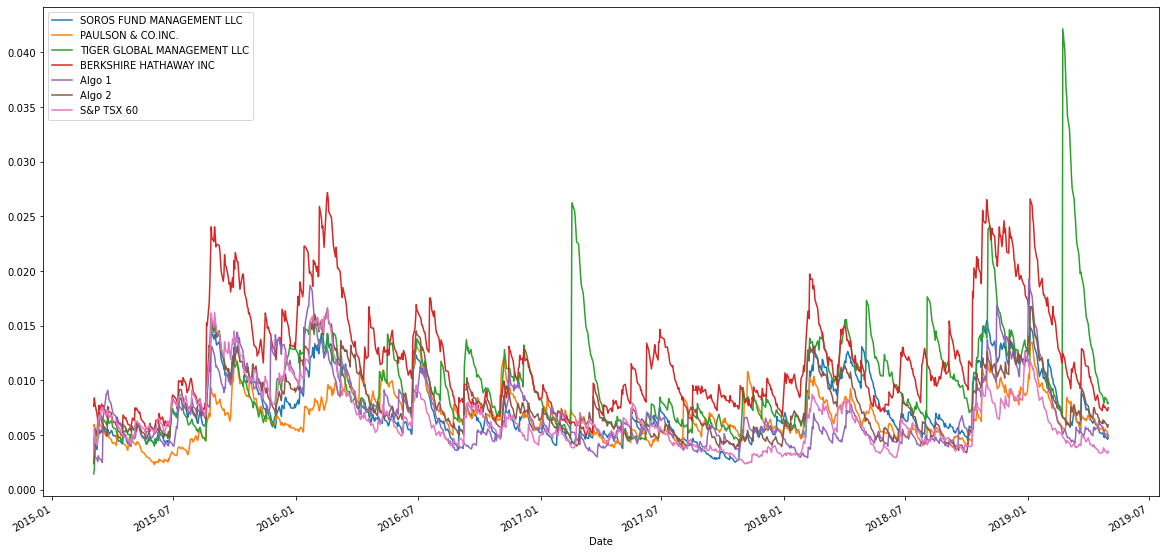

In [51]:
combined_ewm_21 = combined_df.ewm(span=21, adjust=False).std()
combined_ewm_21.plot(figsize=(20,10))

### Sharpe Ratios

#### i.) Sharpe Ratios of Portfolio as a Function of Basic Daily Returns

In [53]:
sharpe_ratios = (combined_df.mean()) * 252 / (combined_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
S&P TSX 60                     0.195550
dtype: float64

<AxesSubplot:title={'center':'All Portfolio Sharpe Ratios'}>

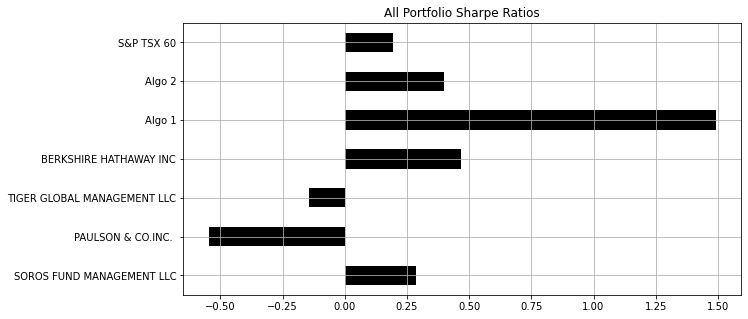

In [60]:
sharpe_ratios.plot(kind="barh", figsize=(10,5), title="All Portfolio Sharpe Ratios", color="black", grid=True)